<a href="https://colab.research.google.com/github/Rashmi-Deoli/IPL2020/blob/main/IPL2020PredPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#https://towardsdatascience.com/predicting-ipl-match-winner-fc9e89f583ce

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#Reading data from CSV file
matches=pd.read_excel("/content/drive/My Drive/IPL-Prediction-2020-WK1/matches.xlsx")

In [ ]:
#To check the number of columns containing null values
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [ ]:
#imputing the values in column city based on venue
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk",
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" ,
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval",
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium",
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']

In [ ]:
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [ ]:
#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,2019-05-07,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,2019-05-08,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,2019-05-10,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

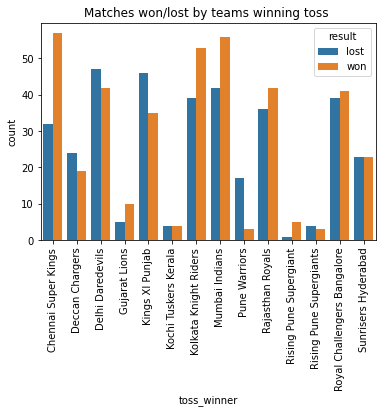

In [ ]:
"""# Visualizations"""
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()
#Visualization
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


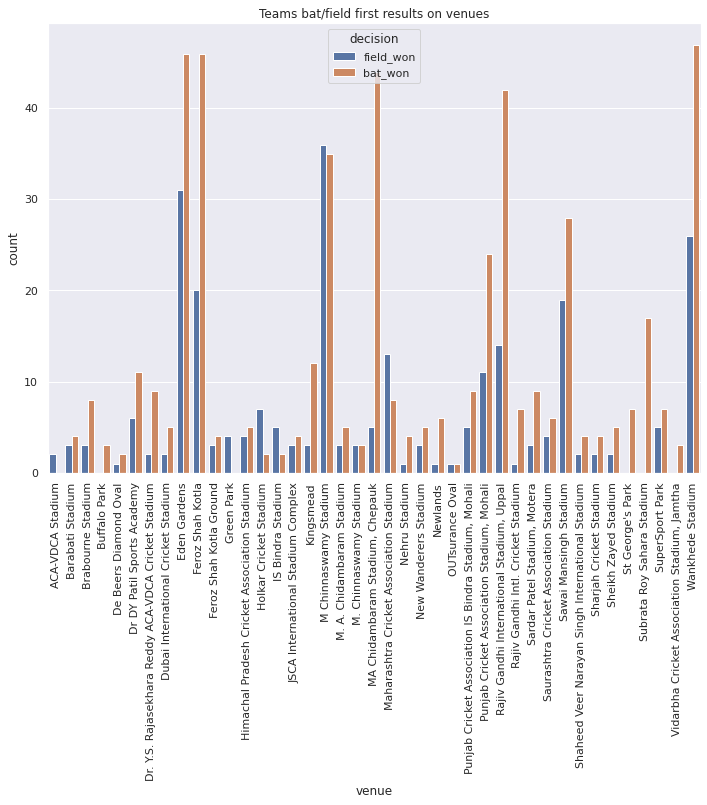

In [ ]:
#Winning stats of teams bat/field first by venues
venue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")
#Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['venue'].unique(),rotation=90)
plt.show()


Text(0.5, 1.0, 'No of matches won by different teams')

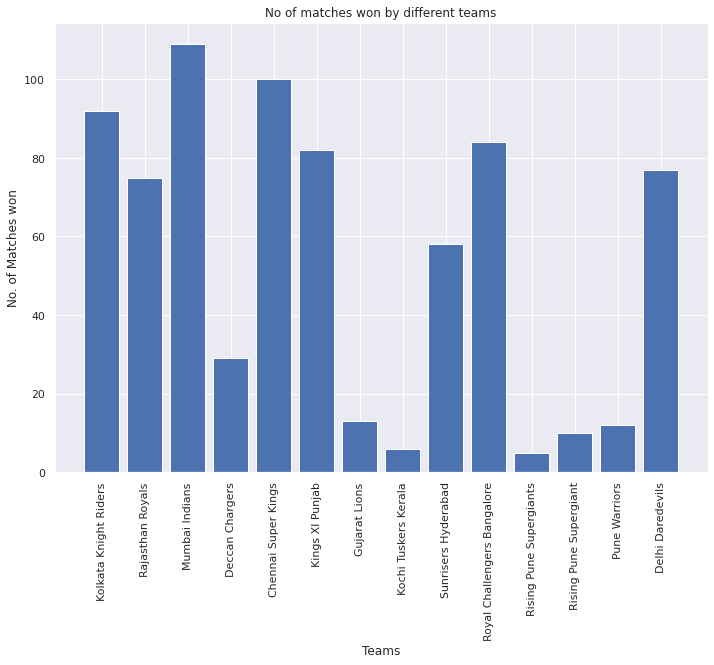

In [ ]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

In [ ]:
"""# Data Preprocessing & Prediction"""
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoder
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

In [ ]:
#outcome variable as a probability of team1 winning
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

In [ ]:
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

In [ ]:

matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

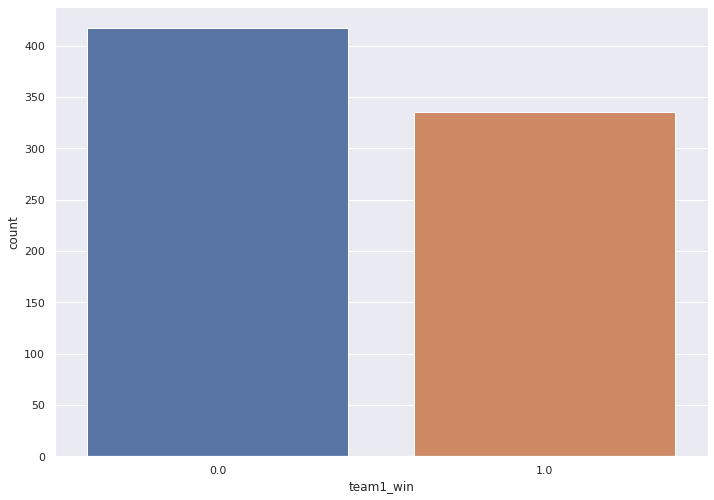

In [ ]:
#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=matches)
plt.show()

In [ ]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

In [ ]:
#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.110626,-0.110583,-0.110583,0.114236
team2,-0.110626,1.000000,-0.006747,-0.006747,0.084116
team1_toss_win,-0.110583,-0.006747,1.000000,1.000000,0.050049
team1_bat,-0.110583,-0.006747,1.000000,1.000000,0.050049
venue,0.114236,0.084116,0.050049,0.050049,1.000000


In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [ ]:
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,6,11,0.0,1.0,17
1,0,4,1.0,1.0,27
2,9,2,1.0,0.0,9
3,7,11,1.0,0.0,40
4,1,6,1.0,0.0,8
...,...,...,...,...,...
751,6,7,0.0,0.0,40
752,0,7,1.0,0.0,18
753,12,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [ ]:
#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, target.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[92  0]
 [59  0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        92
           1       0.00      0.00      0.00        59

    accuracy                           0.61       151
   macro avg       0.30      0.50      0.38       151
weighted avg       0.37      0.61      0.46       151

Accuracy of logistic regression classifier on test set: 0.6093


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

In [ ]:
#SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[82 10]
 [50  9]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        92
           1       0.47      0.15      0.23        59

    accuracy                           0.60       151
   macro avg       0.55      0.52      0.48       151
weighted avg       0.56      0.60      0.54       151

Accuracy of SVM classifier on test set: 0.6026


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[58 34]
 [36 23]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.62        92
           1       0.40      0.39      0.40        59

    accuracy                           0.54       151
   macro avg       0.51      0.51      0.51       151
weighted avg       0.53      0.54      0.53       151

Accuracy of decision tree classifier on test set: 0.5364


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[51 41]
 [36 23]]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        92
           1       0.36      0.39      0.37        59

    accuracy                           0.49       151
   macro avg       0.47      0.47      0.47       151
weighted avg       0.50      0.49      0.49       151

Accuracy of random forest classifier on test set: 0.4901
